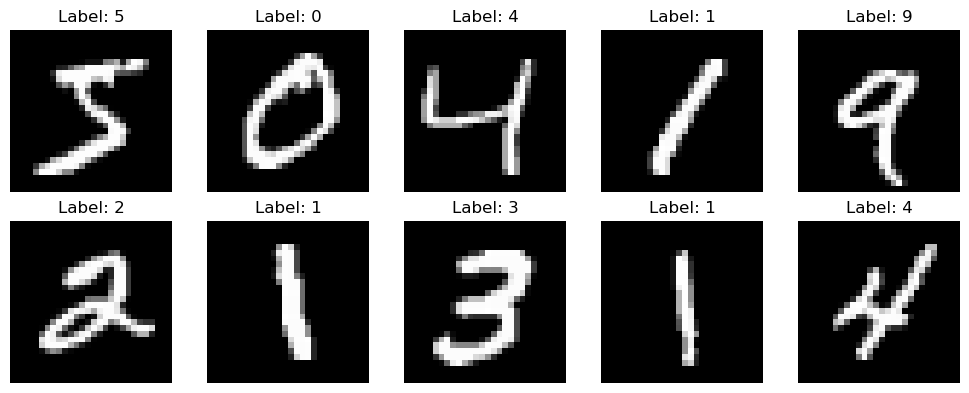

Epoch [1/5] - Loss: 0.1018
Epoch [2/5] - Loss: 0.0326
Epoch [3/5] - Loss: 0.0203
Epoch [4/5] - Loss: 0.0135
Epoch [5/5] - Loss: 0.0088
Accuracy: 98.88%


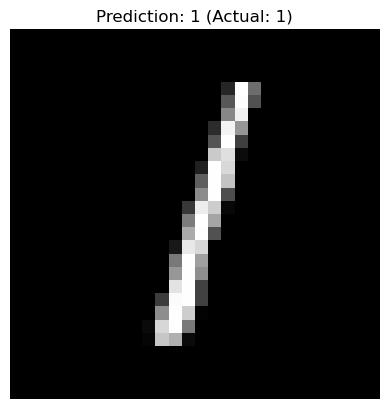

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# this transforms are used to apply transformation for image means converting to tensor resize normalization etc
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(               #extracting thr data 
    root=r"C:\Users\Jinu\OneDrive\Desktop\dataset",  
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root=r"C:\Users\Jinu\OneDrive\Desktop\dataset",
    train=False,
    download=True,
    transform=transform 
)


#dataloader break thr data into batches and shuffle them to train the model for better learning

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)


import matplotlib.pyplot as plt





fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.flatten()

for i in range(10):
    image, label = train_dataset[i]
    image = image.squeeze()  
    axes[i].imshow(image, cmap="gray")
    axes[i].set_title(f"Label: {label}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)    # (1 input channel, 32 filters, 3x3 kernel,padding)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)   # (32 input channels, 64 filters)
        self.pool = nn.MaxPool2d(2)            # 2x2 pooling
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(9216, 128)        #fully comnected layers
        self.bn1 = nn.BatchNorm1d(128)         #normalizes the outputs of the neuron and improves the training speed
        self.fc2 = nn.Linear(128, 10)         
        self.relu = nn.ReLU()                  #RELU  prevents vanishing gradient and keeps only positive values

    def forward(self, x):                    
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))          
        x = self.pool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


for epoch in range(5):           #training loop / backpropogation
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)   #data=x
        loss = criterion(output, target)  # targer=y
        loss.backward()     # calculating the gradient backwards 
        optimizer.step()    # updating the weights
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/5] - Loss: {running_loss/len(train_loader):.4f}")


correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")






#takin a single image and its label from the test dataset
image, label = test_dataset[2] 

# Make the prediction
model.eval() # Set to evaluation mode
with torch.no_grad():
    # unsqueeze(0) adds the 'batch' dimension so the model accepts it
    output = model(image.unsqueeze(0)) 
    prediction = torch.argmax(output, dim=1).item()

# 3. Show the result
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Prediction: {prediction} (Actual: {label})")
plt.axis('off')
plt.show()



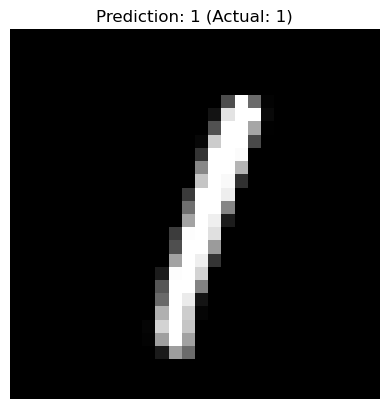

: 

In [ ]:

#takin a single image and its label from the test dataset
image, label = test_dataset[5 ]

# Make the prediction
model.eval() # Set to evaluation mode
with torch.no_grad():
    # unsqueeze(0) adds the 'batch' dimension so the model accepts it
    output = model(image.unsqueeze(0)) 
    prediction = torch.argmax(output, dim=1).item()

# 3. Show the result
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Prediction: {prediction} (Actual: {label})")
plt.axis('off')
plt.show()